In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline


Using TensorFlow backend.


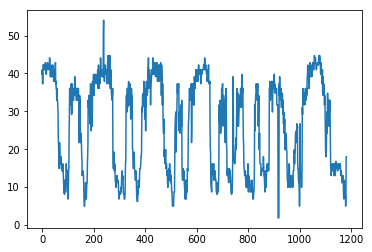

In [3]:
# load the dataset
##bb表表示风速
dataframe = pd.read_excel('speed1.xlsx')
dataset = dataframe.iloc[:,1].values
# 将整型变为float
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()


In [4]:
dataset=dataset[:-1]
print(dataset.shape)

(1181,)


In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(7)


In [38]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = np.reshape(dataset,newshape=(-1,1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



In [39]:
# use this function to prepare the train and test datasets for modeling
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [40]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
print(testX.shape)

(940, 1, 3)
(233, 1, 3)


In [41]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_acc',patience=5)


In [42]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(512, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=200,callbacks=[es],verbose=2)



Epoch 1/50
 - 3s - loss: 0.2420
Epoch 2/50


D:\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 1s - loss: 0.1540
Epoch 3/50
 - 0s - loss: 0.0839
Epoch 4/50
 - 0s - loss: 0.0363
Epoch 5/50
 - 0s - loss: 0.0151
Epoch 6/50
 - 0s - loss: 0.0143
Epoch 7/50
 - 0s - loss: 0.0183
Epoch 8/50
 - 0s - loss: 0.0167
Epoch 9/50
 - 0s - loss: 0.0128
Epoch 10/50
 - 0s - loss: 0.0112
Epoch 11/50
 - 0s - loss: 0.0112
Epoch 12/50
 - 0s - loss: 0.0112
Epoch 13/50
 - 0s - loss: 0.0106
Epoch 14/50
 - 0s - loss: 0.0100
Epoch 15/50
 - 0s - loss: 0.0097
Epoch 16/50
 - 0s - loss: 0.0095
Epoch 17/50
 - 0s - loss: 0.0093
Epoch 18/50
 - 0s - loss: 0.0090
Epoch 19/50
 - 0s - loss: 0.0088
Epoch 20/50
 - 0s - loss: 0.0086
Epoch 21/50
 - 0s - loss: 0.0084
Epoch 22/50
 - 0s - loss: 0.0082
Epoch 23/50
 - 0s - loss: 0.0081
Epoch 24/50
 - 0s - loss: 0.0079
Epoch 25/50
 - 0s - loss: 0.0078
Epoch 26/50
 - 0s - loss: 0.0076
Epoch 27/50
 - 0s - loss: 0.0075
Epoch 28/50
 - 0s - loss: 0.0074
Epoch 29/50
 - 0s - loss: 0.0073
Epoch 30/50
 - 0s - loss: 0.0073
Epoch 31/50
 - 0s - loss: 0.0072
Epoch 32/50
 - 0s - loss: 0.0

In [43]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [44]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [45]:
#预测值的结果
testPredict[:,0]

array([0.40727103, 0.4160072 , 0.3938302 , 0.36803588, 0.3481565 ,
       0.29898039, 0.24996936, 0.21107289, 0.18763807, 0.18838297,
       0.1946726 , 0.19811846, 0.2271056 , 0.25408763, 0.26640627,
       0.22525245, 0.19405265, 0.18822066, 0.1929648 , 0.18763807,
       0.20319356, 0.20442115, 0.20590289, 0.20245002, 0.20311435,
       0.2155931 , 0.21221833, 0.1960663 , 0.20581733, 0.22414277,
       0.24370821, 0.24892648, 0.28892264, 0.32049415, 0.3148323 ,
       0.32782087, 0.32678768, 0.37000063, 0.39780024, 0.40031502,
       0.41786674, 0.39829022, 0.4154342 , 0.43614137, 0.43998572,
       0.4528473 , 0.369742  , 0.31398442, 0.26507136, 0.23494717,
       0.2136603 , 0.20245002, 0.17850299, 0.13573979, 0.12817341,
       0.2765142 , 0.30864716, 0.30483183, 0.24293177, 0.22727858,
       0.22727858, 0.20253257, 0.21098639, 0.22908571, 0.38321364,
       0.4643551 , 0.5841546 , 0.57714546, 0.6048774 , 0.5885228 ,
       0.59273285, 0.60311276, 0.6084094 , 0.61339784, 0.58918

In [46]:
testY[0]

array([0.4047893 , 0.36915708, 0.34521073, 0.33333334, 0.23812263,
       0.19061306, 0.17854407, 0.15478928, 0.17854407, 0.19061306,
       0.17854407, 0.25      , 0.27394637, 0.25      , 0.15478928,
       0.15478928, 0.19061306, 0.17854407, 0.15478928, 0.21436785,
       0.19061306, 0.17854407, 0.19061306, 0.19061306, 0.21436785,
       0.19061306, 0.15478928, 0.21436785, 0.23812263, 0.23812263,
       0.23812263, 0.33333334, 0.34521073, 0.27394637, 0.34521073,
       0.33333334, 0.4047893 , 0.42854407, 0.38103452, 0.44042149,
       0.38103452, 0.42854407, 0.47624522, 0.42854407, 0.46436787,
       0.27394637, 0.25      , 0.25      , 0.19061306, 0.17854407,
       0.19061306, 0.13103449, 0.05957855, 0.11915711, 0.47624522,
       0.28582376, 0.21436785, 0.21436785, 0.21436785, 0.21436785,
       0.15478928, 0.21436785, 0.25      , 0.55957854, 0.52375484,
       0.65478933, 0.57145596, 0.61915714, 0.59521079, 0.59521079,
       0.63103449, 0.61915714, 0.61915714, 0.57145596, 0.63103

In [47]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f MSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MSE' % (testScore))


Train Score: 0.08 MSE
Test Score: 0.06 MSE


<Figure size 720x432 with 0 Axes>

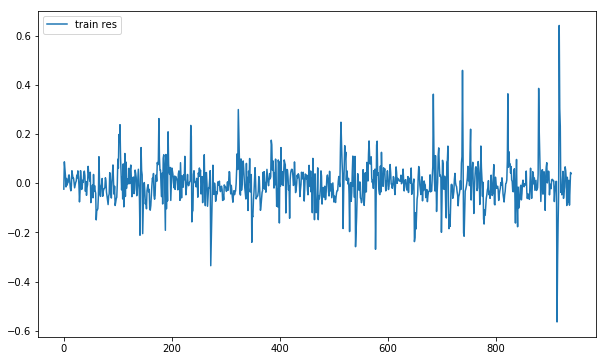

In [48]:
Res_train = []
for i,j in zip(trainY[0], trainPredict[:,0]):
    temp = i-j
    Res_train.append(temp)
Res_train = np.array(Res_train) 
plt.figure(figsize=(10,6))
plt.plot(Res_train,label='train res')
plt.legend(loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

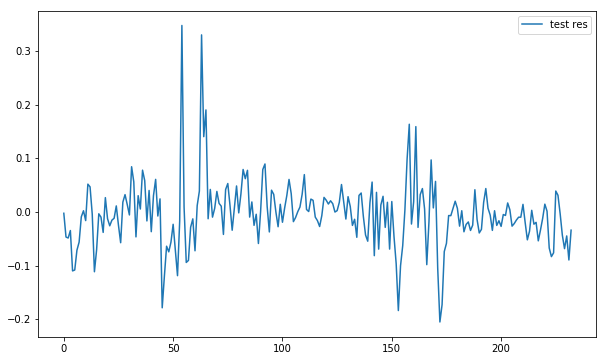

In [49]:
Res_test = []
for i,j in zip(testY[0], testPredict[:,0]):
    temp = i-j
    Res_test.append(temp)
Res_test = np.array(Res_test) 
plt.figure(figsize=(10,6))
plt.plot(Res_test,label='test res')
plt.legend(loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

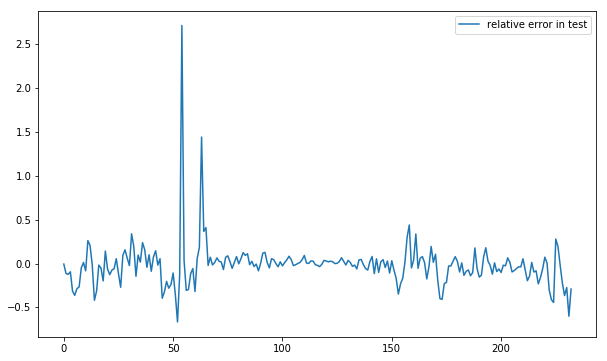

0.12887265712536386


In [50]:
relative_test = []
for i,j in zip(testY[0], testPredict[:,0]):
    temp = (i-j)/j
    relative_test.append(temp)
relative_test = np.array(relative_test) 
plt.figure(figsize=(10,6))
plt.plot(relative_test,label='relative error in test')
plt.legend(loc='best')
plt.show()
print(sum(abs(relative_test))/len(relative_test))

<Figure size 720x432 with 0 Axes>

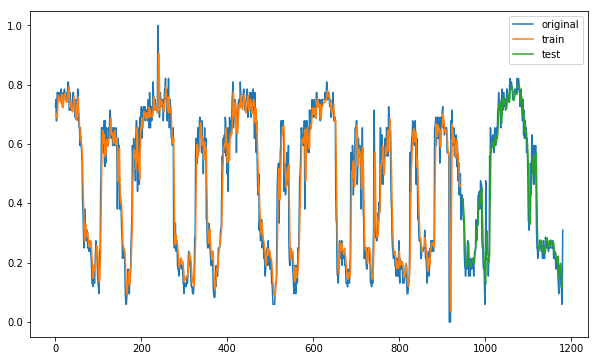

In [51]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset),label='original')
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.legend(loc='best')
plt.show()


In [53]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
print(testPredict.shape)

ss = np.reshape(dataset[-233:],newshape=(-1,1))
print(ss.shape)
mm = np.empty_like(dataset)
mm[:,:] = np.nan
mm[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = ss
print(mm.shape)


(233, 1)
(233, 1)
(1181, 1)


<Figure size 720x432 with 0 Axes>

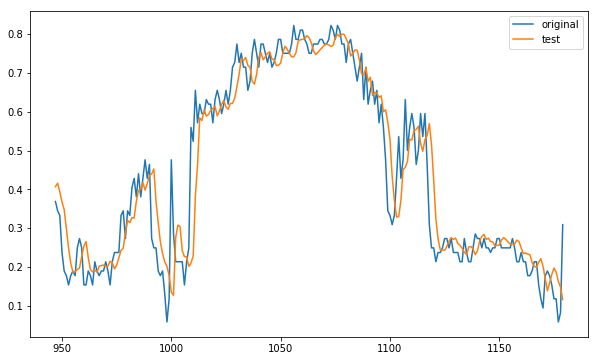

In [54]:
# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(mm),label='original')
plt.plot(testPredictPlot,label='test')
plt.legend(loc='best')
plt.show()

In [55]:
x = dataframe.iloc[:,0]
print(x)

0       4/11/2016 00:08:22
1       4/11/2016 00:16:22
2       4/11/2016 00:19:22
3       4/11/2016 00:22:23
4       4/11/2016 00:31:22
5       4/11/2016 00:33:23
6       4/11/2016 00:41:22
7       4/11/2016 00:51:23
8       4/11/2016 00:55:23
9       4/11/2016 01:00:23
10      4/11/2016 01:04:23
11      4/11/2016 01:10:23
12      4/11/2016 01:15:23
13      4/11/2016 01:21:22
14      4/11/2016 01:26:22
15      4/11/2016 01:31:22
16      4/11/2016 01:33:22
17      4/11/2016 01:39:23
18      4/11/2016 01:46:22
19      4/11/2016 01:47:22
20      4/11/2016 01:54:23
21      4/11/2016 02:01:23
22      4/11/2016 02:06:23
23      4/11/2016 02:10:22
24      4/11/2016 02:16:21
25      4/11/2016 02:20:23
26      4/11/2016 02:26:21
27      4/11/2016 02:30:23
28      4/11/2016 02:36:22
29      4/11/2016 02:39:22
               ...        
1152    4/17/2016 16:30:12
1153    4/17/2016 16:31:13
1154    4/17/2016 16:41:12
1155    4/17/2016 16:46:12
1156    4/17/2016 17:00:12
1157    4/17/2016 17:05:12
1